### Librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import pandas as pd
import numba
from scipy import integrate

### Parámetros del modelo

In [ ]:
resumen_df = pd.read_csv("resumen.csv")

In [ ]:
N = resumen_df["Total"][0] # total de individuos
print(len(resumen_df))
I0 = resumen_df["Infectados"][0]
R0 = 0.

S0 = N - I0 - R0 # Individuos suceptibles
tmax = len(resumen_df) # numero maximo de periodos
Nt = len(resumen_df) 
t = np.linspace(0, tmax, Nt)

b, a = 0.4, 0.1
gamma_S, gamma_I, gamma_R = 0.1, 0.1, 0.1
delta_ = 0.1
delta_L, delta_H = 0.1, 0.4

### Definicion del modelo

In [ ]:
def derivate(X, t):
    S, I, R = X 
    dotS = a - gamma_S * S - a * S * I + delta_L * R
    dotI = a * S * I - (gamma_I + delta_) * I + delta_H * R
    dotR = delta_ * I - (gamma_R + delta_H + delta_L) * R

    return np.array([dotS, dotI, dotR]) 

### Ejecucion de la simulacion

In [ ]:
X0 = S0, I0, R0
res = integrate.odeint(derivate, X0, t)
S, I, R = res.T
Seuil = 1. - 1. /(a/(gamma_S + gamma_I + gamma_R))
Seuil

In [ ]:
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, S, 'orange', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered with immunity')
plt.xlabel('Time t, [days]')
plt.ylabel('Numbers of individuals')
plt.ylim([0,40])
plt.legend()

plt.show();

In [ ]:
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, resumen_df["Infectados"], 'orange', label="Real Infected")
# plt.plot(t, resumen_df["Rec"],'r', label="Real recuperados", marker="o", markersize=2, linestyle="-")
# plt.plot(t, resumen_df["Suc"],'g', label="Real suceptibles", marker="o", markersize=2, linestyle="-")
plt.xlabel('Time t, [days]')
plt.ylabel('Numbers of individuals')
plt.ylim([0,N])
plt.legend()
plt.vlines(360, 0, 40)
plt.vlines(450, 0, 40)  
plt.vlines(570, 0, 40)
plt.vlines(600, 0, 40)
plt.vlines(750, 0, 40)
plt.vlines(800, 0, 40)  
plt.vlines(850, 0, 40)  
plt.vlines(950, 0, 40)
plt.vlines(1100, 0, 40)
plt.vlines(1450, 0, 40)
plt.vlines(1300, 0, 40)


plt.show();

In [ ]:
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, S, 'orange', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered with immunity')
plt.plot(t, resumen_df["Infectados"], 'orange', label="Real Infected", marker="o", markersize=2, linestyle="-")
plt.plot(t, resumen_df["Rec"],'r', label="Real recuperados", marker="o", markersize=2, linestyle="-")
plt.plot(t, resumen_df["Suc"],'g', label="Real suceptibles", marker="o", markersize=2, linestyle="-")
plt.xlabel('Time t, [days]')
plt.ylabel('Numbers of individuals')
plt.ylim([0,N])
plt.legend()

plt.show();

## Optimizacion de parametros

In [ ]:
from scipy.optimize import minimize
from scipy.integrate import odeint


def modelo_sir(X0, t, params):
    b, a, gamma_S, gamma_I, gamma_R, delta_, delta_L, delta_H = params

    def derivate(X, t):
        S, I, R = X 
        dotS = a - gamma_S * S - a * S * I + delta_L * R
        dotI = a * S * I - (gamma_I + delta_) * I + delta_H * R
        dotR = delta_ * I - (gamma_R + delta_H + delta_L) * R

        return np.array([dotS, dotI, dotR]) 

    return odeint(derivate, X0, t)

In [ ]:
def error(params, X0, t, datos_reales_I):
    resultados = modelo_sir(X0, t, params)
    I_modelado = resultados[:, 1]

    return -np.mean((I_modelado - datos_reales_I)**2)

In [ ]:
params_iniciales = [0.4, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4]
bounds = [(0, 1)] * len(params_iniciales)

datos_reales_I = np.array(resumen_df["Infectados"])

resultado = minimize(error, params_iniciales, args=(X0, t, datos_reales_I), bounds=bounds)

params_optimos = resultado.x
print("Pamaretros optimos: ", params_optimos)

#### Simulaciones con parametros optimos

In [ ]:
b, a, gamma_S, gamma_I, gamma_R, delta_, delta_L, delta_H = params_optimos
X0 = S0, I0, R0
res = integrate.odeint(derivate, X0, t)
S, I, R = res.T
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, S, 'orange', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered with immunity')
plt.xlabel('Time t, [days]')
plt.ylabel('Numbers of individuals')
plt.ylim([0,N])
plt.legend()

plt.show();

plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, resumen_df["Infectados"], 'orange', label="Real Infected", marker="o", markersize=2, linestyle="-")
plt.plot(t, resumen_df["Rec"],'r', label="Real recuperados", marker="o", markersize=2, linestyle="-")
plt.plot(t, resumen_df["Suc"],'g', label="Real suceptibles", marker="o", markersize=2, linestyle="-")
plt.xlabel('Time t, [days]')
plt.ylabel('Numbers of individuals')
plt.ylim([0,N])
plt.legend()

plt.show();

plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, S, 'orange', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered with immunity')
plt.plot(t, resumen_df["Infectados"], 'orange', label="Real Infected", marker="o", markersize=2, linestyle="-")
plt.plot(t, resumen_df["Rec"],'r', label="Real recuperados", marker="o", markersize=2, linestyle="-")
plt.plot(t, resumen_df["Suc"],'g', label="Real suceptibles", marker="o", markersize=2, linestyle="-")
plt.xlabel('Time t, [days]')
plt.ylabel('Numbers of individuals')
plt.ylim([0,N])
plt.legend()

plt.show();


## Separacion de datos y aproximacion por intervalos

In [ ]:
intervalos = [360, 450, 570, 600, 750, 800, 850, 950, 1100,  1300, 1450]
puntos = [0] + intervalos + [len(resumen_df)]

segmentos = []

for i in range(len(puntos)-1):
    inicio = puntos[i]
    fin = puntos[i+1]
    segmentos.append(resumen_df.iloc[inicio:fin])

for i, segmento in enumerate(segmentos):
    plt.figure()
    plt.grid()
    plt.title(f"Resultados segmento {i}")
    plt.plot(segmento["Infectados"], 'b', label="Real Infected")
    plt.show()

In [ ]:
def plot_res(datos_reales):
    t_inicio = datos_reales.index[0]
    Nt = len(datos_reales) 
    t = np.linspace(t_inicio, t_inicio + Nt, Nt)

    params_iniciales = [0.4, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.4]
    bounds = [(0, 1)] * len(params_iniciales)

    datos_reales_I = np.array(datos_reales["Infectados"])

    I0 = datos_reales["Infectados"].iloc[0]
    R0 = 0.0
    N = 34
    S0 = N - I0 - R0 # Individuos suceptibles
    X0 = S0, I0, R0
    resultado = minimize(error, params_iniciales, args=(X0, t, datos_reales_I), bounds=bounds)

    params_optimos = resultado.x

    b, a, gamma_S, gamma_I, gamma_R, delta_, delta_L, delta_H = params_optimos
    res = integrate.odeint(derivate, X0, t)
    S, I, R = res.T
    plt.figure()
    plt.grid()
    plt.title("odeint method")
    # plt.plot(t, S, 'orange', label='Susceptible')
    plt.plot(t, I, 'r', label='Infected')
    # plt.plot(t, R, 'g', label='Recovered with immunity')
    plt.xlabel('Time t, [days]')
    plt.ylabel('Numbers of individuals')
    plt.ylim([0,N])
    plt.plot(datos_reales["Infectados"], 'blue')
    plt.legend()

    plt.show();




In [ ]:
# for i, segmento in enumerate(segmentos):
#     plot_res(segmento)

## Log-retornos

In [ ]:
datos = np.array(resumen_df["Infectados"])
plt.plot(datos, 'b')
plt.grid()
plt.show()

In [ ]:
log_r = np.log(datos[1:]/ datos[:-1])
plt.plot(log_r, 'r')
plt.grid()
plt.plot()

In [ ]:
resumen_df.head(10)

## Analisis de cambio en la serie de tiempo

In [ ]:
import ruptures as rpt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

resumen_df = pd.read_csv("resumen.csv")
datos = np.array(resumen_df["Infectados"])
plt.figure(figsize=(10, 6))
plt.plot(datos, 'b', label="Infectados")
plt.grid()
plt.legend()
plt.title("Serie de tiempo")

In [ ]:
def gen_particion(intervalos, datos):
    puntos = [0] + intervalos + [len(datos)]

    segmentos = []

    for i in range(len(puntos)-1):
        inicio = puntos[i]
        fin = puntos[i+1]
        segmentos.append(datos[inicio:fin])

    return segmentos


In [ ]:
model = "l2"
algo = rpt.Pelt(model=model).fit(datos)
result = algo.predict(pen=30)

print("Cambios detectados: ", len(result))
plt.figure(figsize=(10, 6))
plt.plot(datos, 'b', label = 'Infectados')
for cp in result:
    plt.axvline(x=cp, color='r', linestyle='--', label='Puntos de cambio' if cp==result[0] else "")
plt.title("Cambios en la serie de tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Infectados")
plt.legend()
plt.show()


particion = gen_particion(result, datos)


In [ ]:
def plot_res(datos_reales):
    if len(datos_reales) == 0: 
        return ; 
    Nt = len(datos_reales) 
    t = np.linspace(0, Nt, Nt)

    params_iniciales = [0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4]
    # bounds = [(0, 1)] * len(params_iniciales)

    bounds = [(0, 1), 
              (0, 2),
              (0, 1),
              (0, 3),
              (0, 2),
              (0, 1),
              (0, 1),
              (0, 5)]

    datos_reales_I = np.array(datos_reales)

    I0 = datos_reales[0]
    R0 = 0.0
    N = 34
    S0 = N - I0 - R0 # Individuos suceptibles
    X0 = S0, I0, R0
    resultado = minimize(error, params_iniciales, args=(X0, t, datos_reales_I), bounds=bounds)

    params_optimos = resultado.x
    b, a, gamma_S, gamma_I, gamma_R, delta_, delta_L, delta_H = params_optimos
    print(f"Parametros optimos: \nb: {b}, \na: {a}, \ngamma_S: {gamma_S}, \ngamma_I: {gamma_I}, \ngamma_R: {gamma_R}, \ndelta_: {delta_}, \ndelta_L: {delta_L}, \ndelta_H: {delta_H}\n")
    res = integrate.odeint(derivate, X0, t)
    S, I, R = res.T
    plt.figure()
    plt.grid()
    plt.title("odeint method")
    # plt.plot(t, S, 'orange', label='Susceptible')
    plt.plot(t, I, 'r', label='Infected')
    # plt.plot(t, R, 'g', label='Recovered with immunity')
    plt.xlabel('Time t, [days]')
    plt.ylabel('Numbers of individuals')
    plt.ylim([0,N])
    plt.plot(datos_reales, 'blue')
    plt.legend()

    plt.show();




In [ ]:
# for elemento in particion:
#     plot_res(elemento)

In [ ]:
model = "l2"
algo = rpt.Pelt(model=model).fit(datos)
result = algo.predict(pen=5)

print("Cambios detectados: ", len(result))
plt.figure(figsize=(10, 6))
plt.plot(datos, 'b', label = 'Infectados')
for cp in result:
    plt.axvline(x=cp, color='r', linestyle='--', label='Puntos de cambio' if cp==result[0] else "")
plt.title("Cambios en la serie de tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Infectados")
plt.legend()
plt.show()


particion = gen_particion(result, datos)


# for elemento in particion:
#     plot_res(elemento)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pygad

import ruptures as rpt
import pandas as pd
resumen_df = pd.read_csv("resumen.csv")
datos_df = resumen_df["Infectados"]
datos = np.array(resumen_df["Infectados"])


In [ ]:
def plot_res_evolutivo(datos_reales, m=10, generations=50, pop_size=30):
    # 1. Preparar datos y condiciones iniciales
    Nt = len(datos_reales)
    t = np.linspace(0, Nt-1, Nt)
    datos_I = datos_reales["Infectados"].values
    I0 = datos_I[0]
    R0 = 0.0
    N = 34
    S0 = N - I0 - R0
    X0 = (S0, I0, R0)

    # 2. Defino la derivada con parámetros dependientes del tiempo
    def deriv(X, t, genes):
        S, I, R = X
        # Interpolación de a(t) y gamma_I(t)
        pts_t = np.linspace(0, Nt-1, m)
        a_t = np.interp(t, pts_t, genes[0:m])
        gamma_I_t = np.interp(t, pts_t, genes[m:2*m])
        # Constantes b, gamma_S, gamma_R, delta_, delta_L, delta_H
        b, gamma_S, gamma_R, delta_, delta_L, delta_H = genes[2*m:]
        dS = b - gamma_S*S - a_t*S*I + delta_L*R
        dI = a_t*S*I - (gamma_I_t + delta_)*I + delta_H*R
        dR = delta_*I - (gamma_R + delta_H + delta_L)*R
        return [dS, dI, dR]

    # 3. Fitness function con los 3 parámetros requeridos por PyGAD
    def fitness(ga_instance, solution, sol_idx):
        sim = odeint(deriv, X0, t, args=(solution,))
        I_pred = sim[:, 1]
        mse = np.mean((I_pred - datos_I) ** 2)
        return -mse

    # 4. Configuración del GA
    num_genes = 2*m + 6
    ga = pygad.GA(
        num_generations=generations,
        sol_per_pop=pop_size,
        num_parents_mating=pop_size//2,
        fitness_func=fitness,
        num_genes=num_genes,
        gene_space=[{'low': 0.0, 'high': 1.0}] * num_genes,
        mutation_percent_genes=10,
        suppress_warnings=True
    )

    # 5. Ejecutar GA y extraer la mejor solución
    ga.run()
    best_solution, best_fitness, _ = ga.best_solution()
    
    # 6. Simulación final con parámetros óptimos
    sim = odeint(deriv, X0, t, args=(best_solution,))
    S_fit, I_fit, R_fit = sim.T

    # 7. Gráfica de ajuste
    plt.figure(figsize=(8,4))
    plt.plot(datos_reales.index, datos_I, 'o', label="Datos reales (I)", alpha=0.6)
    plt.plot(datos_reales.index, I_fit, '-', color='red', label="Ajuste evolutivo (I)")
    plt.title("Ajuste SIR con parámetros dependientes del tiempo")
    plt.xlabel("Tiempo (días)")
    plt.ylabel("Número de infectados")
    plt.ylim(0, N)
    plt.grid(True)
    plt.legend()
    plt.show()


In [ ]:
plot_res_evolutivo(resumen_df)

Cambios detectados:  25


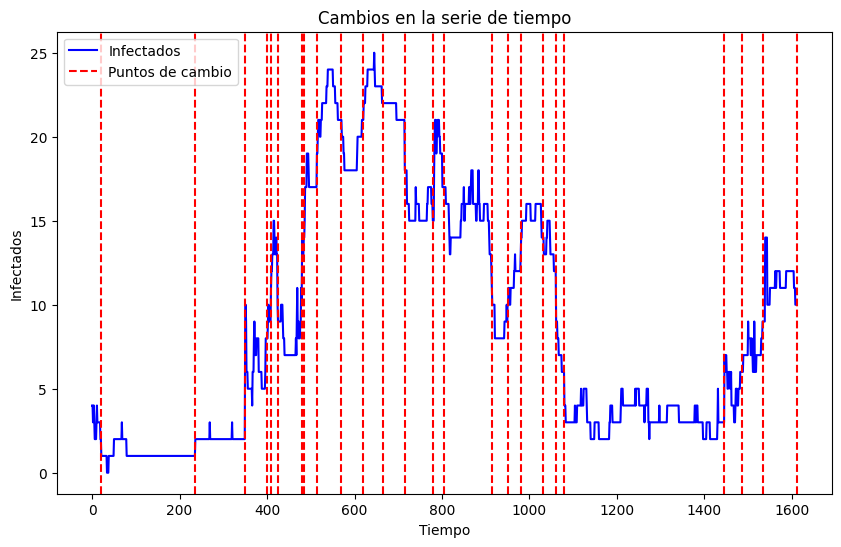

C:\Users\cesar\AppData\Local\Temp\ipykernel_14144\2264014407.py:77: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sim = odeint(deriv, X0, t, args=(solution,))


Parametros:
a_t: ['0.0928', '0.1331', '0.1848', '0.2354', '0.0928', '0.3044', '0.2643', '0.5283', '0.6902', '0.8392']
gamma_I_t:  ['0.9023', '0.8947', '0.0974', '0.0082', '0.0157', '0.0465', '0.0470', '0.9284', '0.5751', '0.3606']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9162', '0.0443', '0.2450', '0.1810', '0.6675', '0.9006']


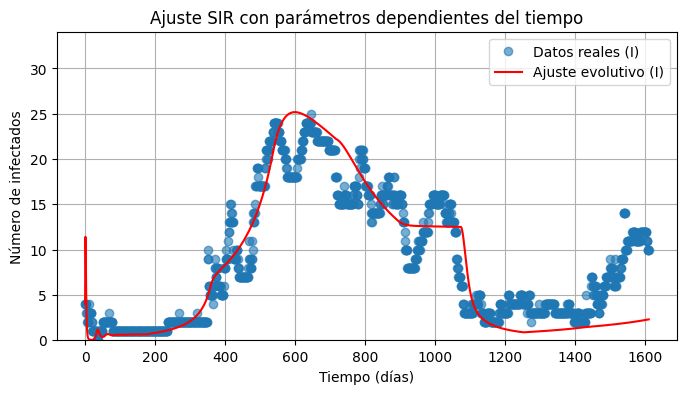

Parametros:
a_t: ['0.0000', '0.1671', '0.4654', '0.8297', '0.1883', '0.8337', '0.8920', '0.3608', '0.8689', '0.1986']
gamma_I_t:  ['0.5007', '0.3168', '0.1721', '0.6497', '0.1424', '0.1205', '0.0654', '0.2008', '0.3118', '0.6755']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9350', '0.8258', '0.0126', '0.4572', '0.0546', '0.4099']


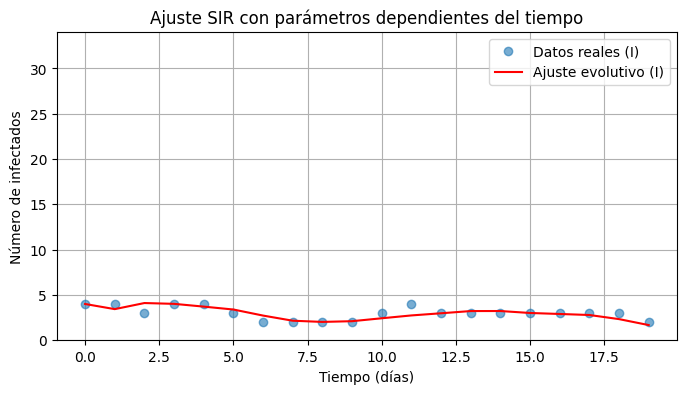

Tiempo de ajuste 29.6589s para el elemeto 1
Parametros:
a_t: ['0.0475', '0.0538', '0.2337', '0.8481', '0.4747', '0.3470', '0.5482', '0.9934', '0.4161', '0.0629']
gamma_I_t:  ['0.9789', '0.3227', '0.1736', '0.5392', '0.4358', '0.5188', '0.3157', '0.2477', '0.4646', '0.1321']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.6936', '0.0391', '0.1666', '0.7402', '0.0261', '0.4610']


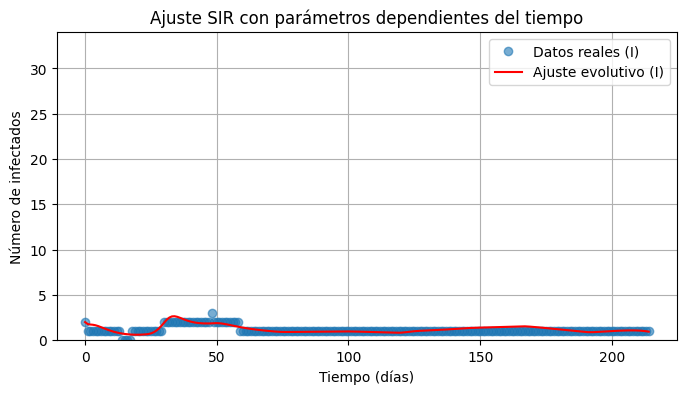

Tiempo de ajuste 54.3170s para el elemeto 2
Parametros:
a_t: ['0.0081', '0.3354', '0.6987', '0.7069', '0.5204', '0.6424', '0.1502', '0.5191', '0.6902', '0.4376']
gamma_I_t:  ['0.9912', '0.8722', '0.1518', '0.4707', '0.3077', '0.3703', '0.1291', '0.3945', '0.3436', '0.2877']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9552', '0.1457', '0.0561', '0.7766', '0.2927', '0.3193']


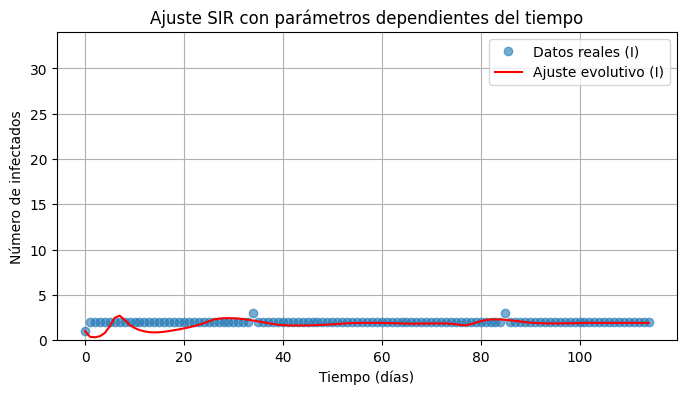

Tiempo de ajuste 46.3687s para el elemeto 3
Parametros:
a_t: ['0.1180', '0.1061', '0.6491', '0.0530', '0.3596', '0.5510', '0.5973', '0.0722', '0.1938', '0.4820']
gamma_I_t:  ['0.9990', '0.3135', '0.0980', '0.0754', '0.1197', '0.0766', '0.1575', '0.1759', '0.1424', '0.0589']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9901', '0.0498', '0.0677', '0.5979', '0.3314', '0.9808']


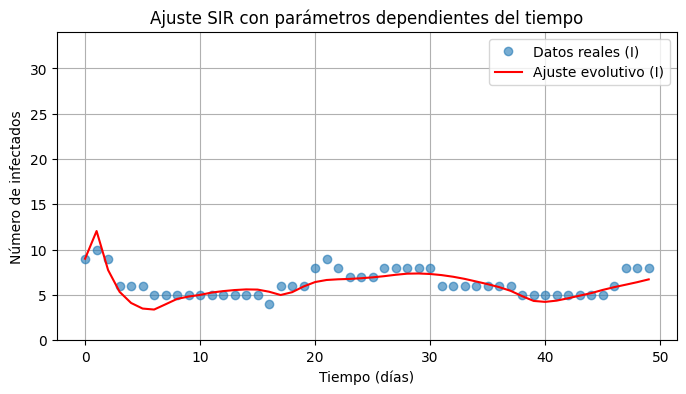

Tiempo de ajuste 41.9871s para el elemeto 4
Parametros:
a_t: ['0.3428', '0.1817', '0.8081', '0.4573', '0.9460', '0.9283', '0.6172', '0.7025', '0.8949', '0.8898']
gamma_I_t:  ['0.9229', '0.7520', '0.0982', '0.0138', '0.2490', '0.0117', '0.0144', '0.1993', '0.0131', '0.0511']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9855', '0.0409', '0.0291', '0.9881', '0.6170', '0.2871']


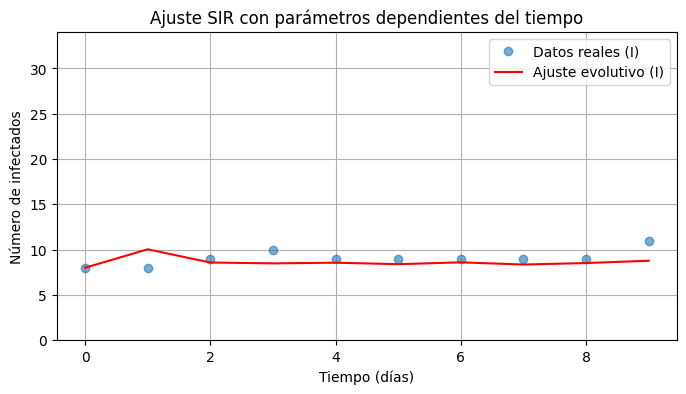

Tiempo de ajuste 30.9520s para el elemeto 5
Parametros:
a_t: ['0.3973', '0.7366', '0.5704', '0.8617', '0.5621', '0.6460', '0.1441', '0.9331', '0.3799', '0.3555']
gamma_I_t:  ['0.8743', '0.0533', '0.0878', '0.0158', '0.1589', '0.0647', '0.0596', '0.1056', '0.1082', '0.0403']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9662', '0.0775', '0.0041', '0.9913', '0.5311', '0.9059']


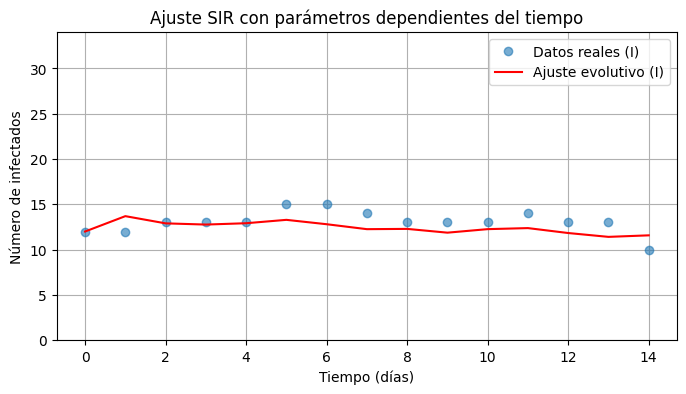

Tiempo de ajuste 36.4349s para el elemeto 6
Parametros:
a_t: ['0.0410', '0.0623', '0.7871', '0.8721', '0.4661', '0.5899', '0.4706', '0.9033', '0.0102', '0.1016']
gamma_I_t:  ['0.6516', '0.1197', '0.2167', '0.1203', '0.1780', '0.1821', '0.1173', '0.0329', '0.0545', '0.2645']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9879', '0.0438', '0.1150', '0.0813', '0.8507', '0.5395']


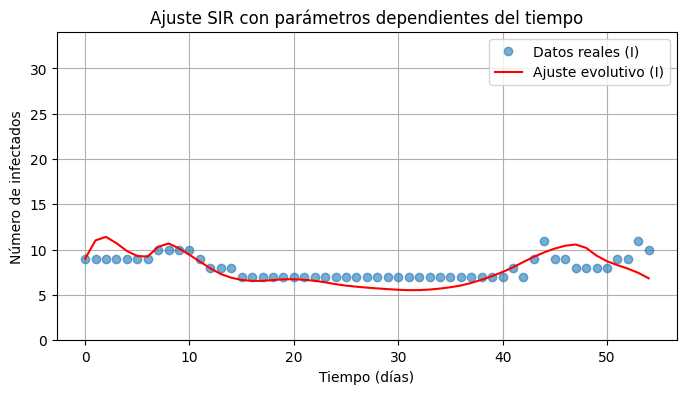

Tiempo de ajuste 43.2638s para el elemeto 7
Parametros:
a_t: ['0.3655', '0.0720', '0.0952', '0.1697', '0.3066', '0.3419', '0.1121', '0.2244', '0.4741', '0.8892']
gamma_I_t:  ['0.2528', '0.6666', '0.2947', '0.1528', '0.3378', '0.0163', '0.0137', '0.0160', '0.0338', '0.4323']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.4639', '0.0746', '0.0117', '0.9034', '0.9516', '0.9211']


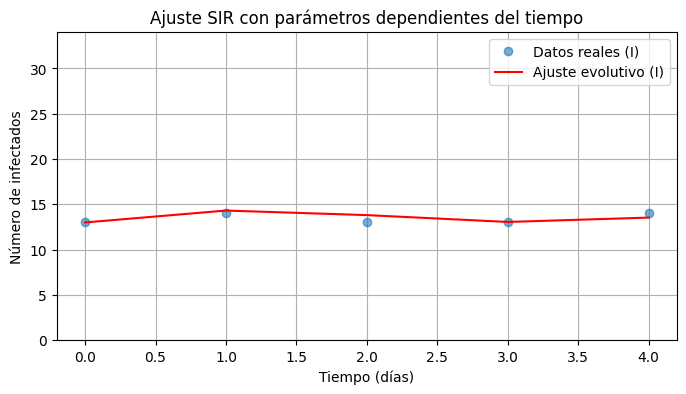

Tiempo de ajuste 28.3998s para el elemeto 8
Parametros:
a_t: ['0.4161', '0.5137', '0.0362', '0.4374', '0.9141', '0.1497', '0.1485', '0.5694', '0.6736', '0.4412']
gamma_I_t:  ['0.6066', '0.0024', '0.0290', '0.0406', '0.0120', '0.1046', '0.1536', '0.0198', '0.0359', '0.1733']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9845', '0.0607', '0.5617', '0.0225', '0.6162', '0.7578']


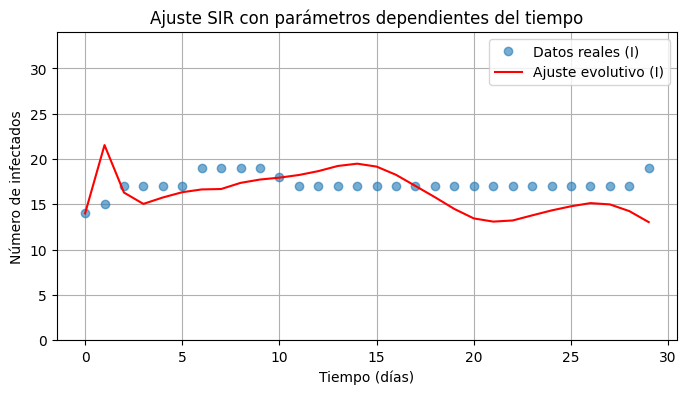

Tiempo de ajuste 47.2838s para el elemeto 9
Parametros:
a_t: ['0.4635', '0.7325', '0.6125', '0.7961', '0.4326', '0.5102', '0.4967', '0.3190', '0.6822', '0.8838']
gamma_I_t:  ['0.0546', '0.0552', '0.0038', '0.0061', '0.0048', '0.1671', '0.1320', '0.0094', '0.1635', '0.9241']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9026', '0.0911', '0.0131', '0.5036', '0.3411', '0.9199']


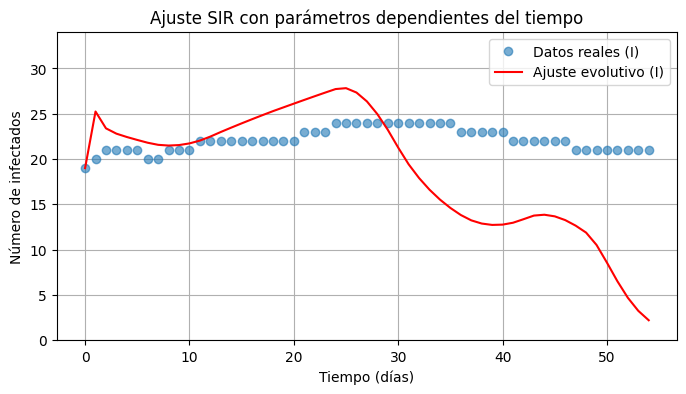

Tiempo de ajuste 58.8469s para el elemeto 10
Parametros:
a_t: ['0.8988', '0.3697', '0.2721', '0.0128', '0.7253', '0.4685', '0.4133', '0.5919', '0.8744', '0.6178']
gamma_I_t:  ['0.0258', '0.0463', '0.0020', '0.1055', '0.1017', '0.0073', '0.0286', '0.1037', '0.0289', '0.0396']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9386', '0.0138', '0.0183', '0.4361', '0.6859', '0.0786']


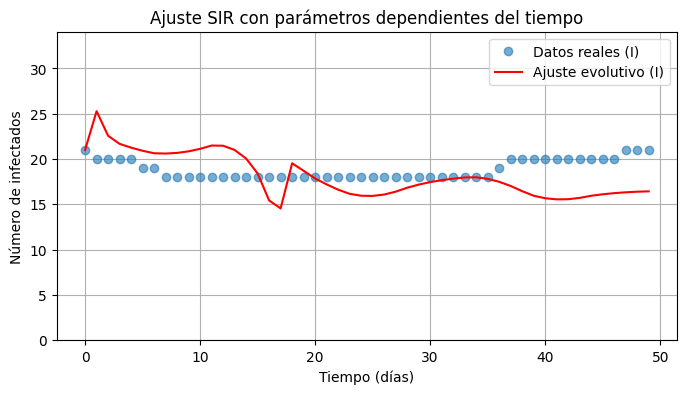

Tiempo de ajuste 61.3822s para el elemeto 11
Parametros:
a_t: ['0.6676', '0.7098', '0.4777', '0.4232', '0.2618', '0.7153', '0.5893', '0.4746', '0.7059', '0.2032']
gamma_I_t:  ['0.0168', '0.0839', '0.0319', '0.0331', '0.0155', '0.0409', '0.1047', '0.0773', '0.1760', '0.9288']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9548', '0.0216', '0.0048', '0.2505', '0.0732', '0.7145']


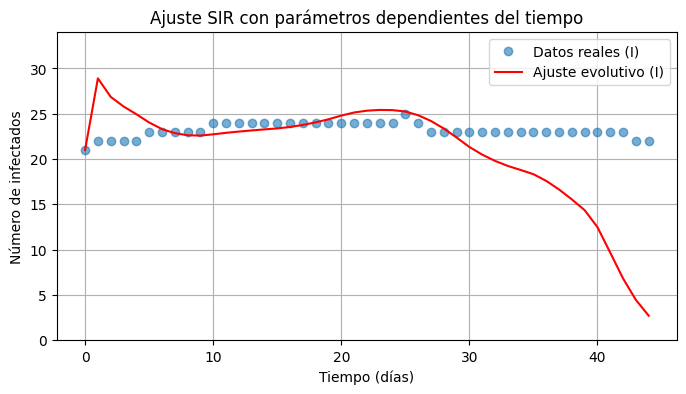

Tiempo de ajuste 50.3355s para el elemeto 12
Parametros:
a_t: ['0.5104', '0.2089', '0.6694', '0.9082', '0.0321', '0.8767', '0.4262', '0.7932', '0.9919', '0.8775']
gamma_I_t:  ['0.1035', '0.0963', '0.0552', '0.0484', '0.0231', '0.0445', '0.2423', '0.0180', '0.0887', '0.1154']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9452', '0.2171', '0.1278', '0.0264', '0.5919', '0.9136']


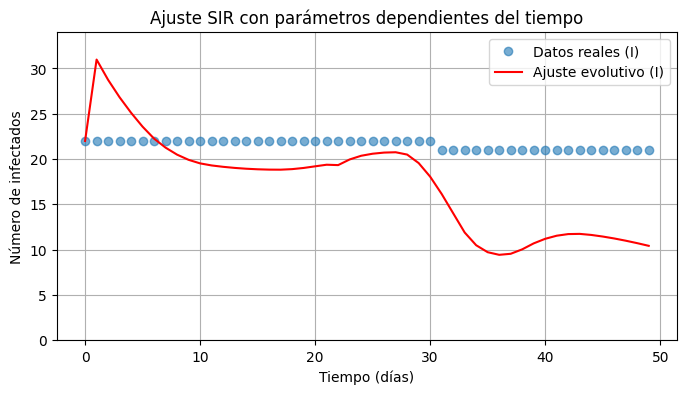

Tiempo de ajuste 51.8514s para el elemeto 13
Parametros:
a_t: ['0.0797', '0.4331', '0.1468', '0.2118', '0.7123', '0.5590', '0.0114', '0.0679', '0.9392', '0.4244']
gamma_I_t:  ['0.1219', '0.1556', '0.0186', '0.0378', '0.0639', '0.0297', '0.0065', '0.0103', '0.0750', '0.1669']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9842', '0.2900', '0.4132', '0.0722', '0.8880', '0.8119']


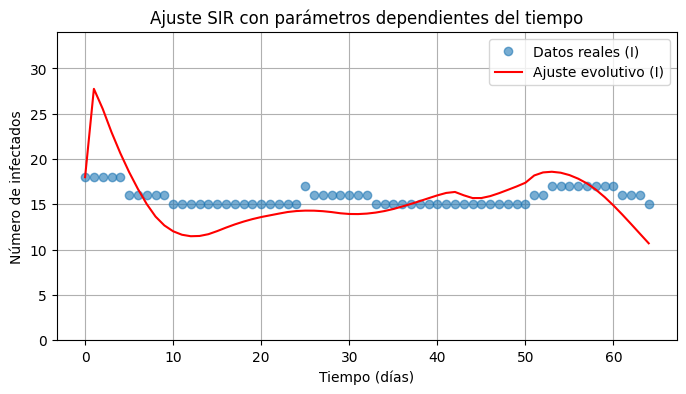

Tiempo de ajuste 51.8210s para el elemeto 14
Parametros:
a_t: ['0.7538', '0.0518', '0.2480', '0.0959', '0.7121', '0.9717', '0.6495', '0.6211', '0.7611', '0.9720']
gamma_I_t:  ['0.1948', '0.0970', '0.0037', '0.0618', '0.0102', '0.0196', '0.0702', '0.1291', '0.1631', '0.0311']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9877', '0.0434', '0.1306', '0.0713', '0.1166', '0.3060']


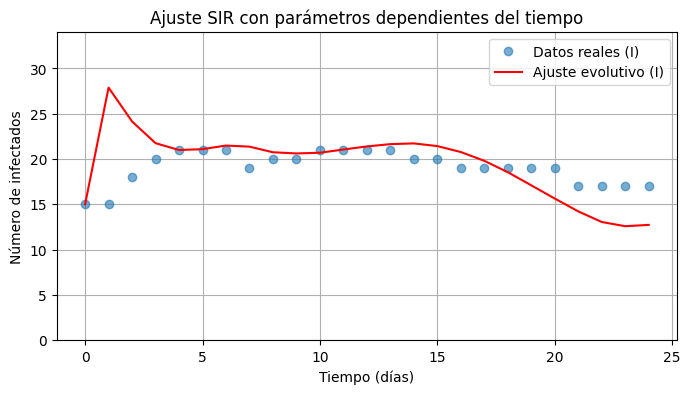

Tiempo de ajuste 41.5591s para el elemeto 15
Parametros:
a_t: ['0.0154', '0.6095', '0.5303', '0.7819', '0.5539', '0.8525', '0.1787', '0.8908', '0.5424', '0.3159']
gamma_I_t:  ['0.1934', '0.0617', '0.0835', '0.0702', '0.0039', '0.0305', '0.0453', '0.1286', '0.0902', '0.1309']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9860', '0.3519', '0.0580', '0.0453', '0.1467', '0.0408']


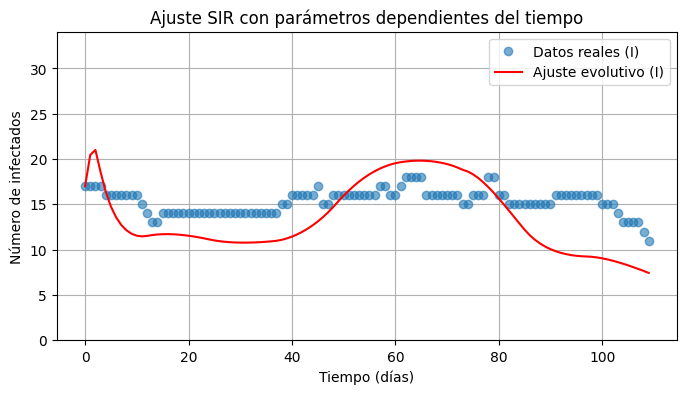

Tiempo de ajuste 80.5074s para el elemeto 16
Parametros:
a_t: ['0.0485', '0.2856', '0.7532', '0.8508', '0.7144', '0.0661', '0.2752', '0.4164', '0.1330', '0.4006']
gamma_I_t:  ['0.8118', '0.0762', '0.2425', '0.1044', '0.0936', '0.0385', '0.1844', '0.0431', '0.0600', '0.0651']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9606', '0.0129', '0.0157', '0.9324', '0.4560', '0.8366']


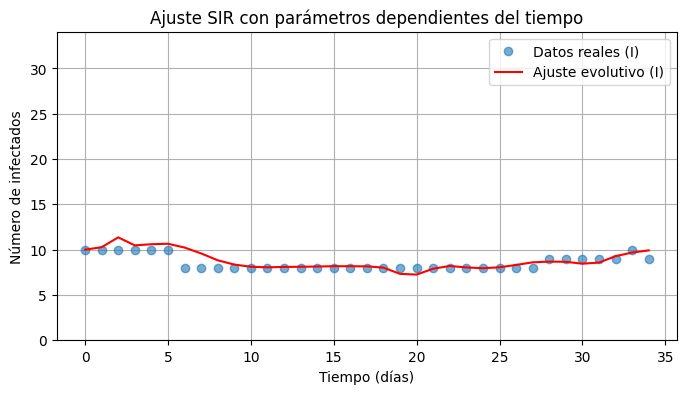

Tiempo de ajuste 43.8660s para el elemeto 17
Parametros:
a_t: ['0.0233', '0.4889', '0.8854', '0.3092', '0.5705', '0.8461', '0.2720', '0.2216', '0.7656', '0.8312']
gamma_I_t:  ['0.9533', '0.0004', '0.0215', '0.0455', '0.1120', '0.0965', '0.0267', '0.0477', '0.1044', '0.3870']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9690', '0.1730', '0.0149', '0.5601', '0.1753', '0.6162']


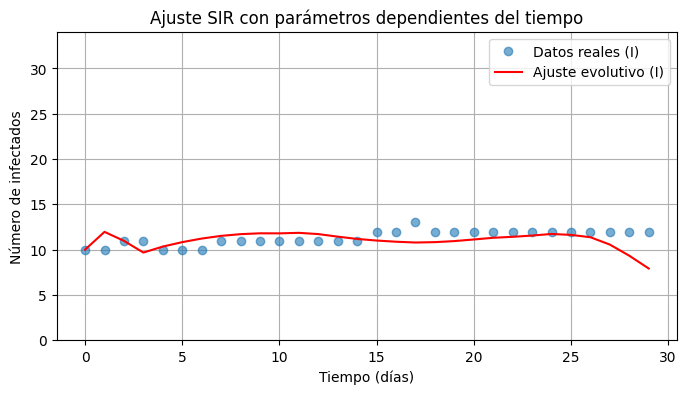

Tiempo de ajuste 43.8055s para el elemeto 18
Parametros:
a_t: ['0.4666', '0.7827', '0.5974', '0.7926', '0.7266', '0.2941', '0.0563', '0.8192', '0.5366', '0.6132']
gamma_I_t:  ['0.3758', '0.0331', '0.0509', '0.0355', '0.1133', '0.0102', '0.0029', '0.1092', '0.0470', '0.2438']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9547', '0.2133', '0.0093', '0.3235', '0.3534', '0.8879']


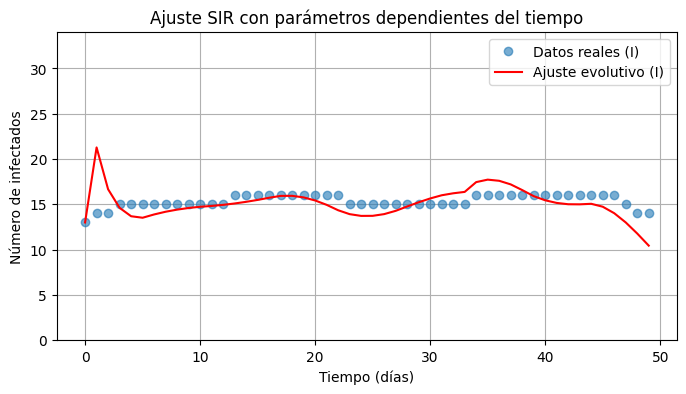

Tiempo de ajuste 52.0222s para el elemeto 19
Parametros:
a_t: ['0.7278', '0.2613', '0.4270', '0.1221', '0.8220', '0.5517', '0.4903', '0.5867', '0.3559', '0.6456']
gamma_I_t:  ['0.3893', '0.0342', '0.0256', '0.0133', '0.0479', '0.1892', '0.0018', '0.1050', '0.1299', '0.1234']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9077', '0.2025', '0.0087', '0.7954', '0.3041', '0.8648']


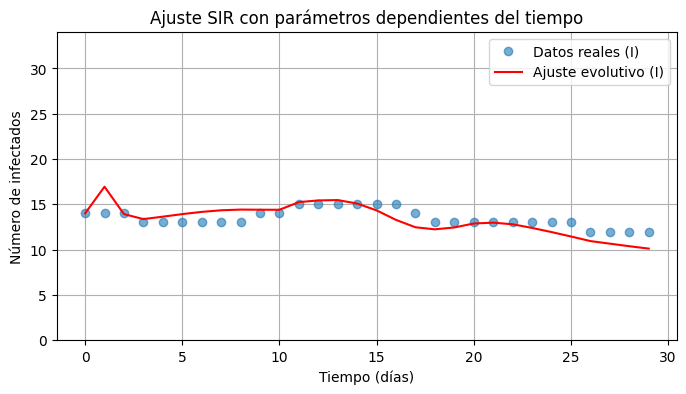

Tiempo de ajuste 45.0172s para el elemeto 20
Parametros:
a_t: ['0.7723', '0.4602', '0.8615', '0.9327', '0.7623', '0.2972', '0.2185', '0.1921', '0.3786', '0.7162']
gamma_I_t:  ['0.9447', '0.0535', '0.1571', '0.2059', '0.0315', '0.0171', '0.1086', '0.2582', '0.3588', '0.2371']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.8342', '0.1135', '0.0031', '0.9788', '0.2974', '0.4872']


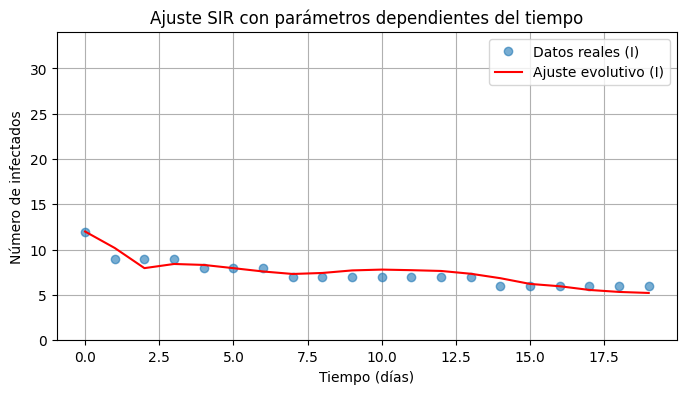

Tiempo de ajuste 36.8358s para el elemeto 21
Parametros:
a_t: ['0.0104', '0.1981', '0.1805', '0.7584', '0.9918', '0.5906', '0.9740', '0.7470', '0.4516', '0.2672']
gamma_I_t:  ['0.6488', '0.1459', '0.3103', '0.3373', '0.0652', '0.2961', '0.2221', '0.3283', '0.2619', '0.4395']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9473', '0.0659', '0.6885', '0.1457', '0.1531', '0.7433']


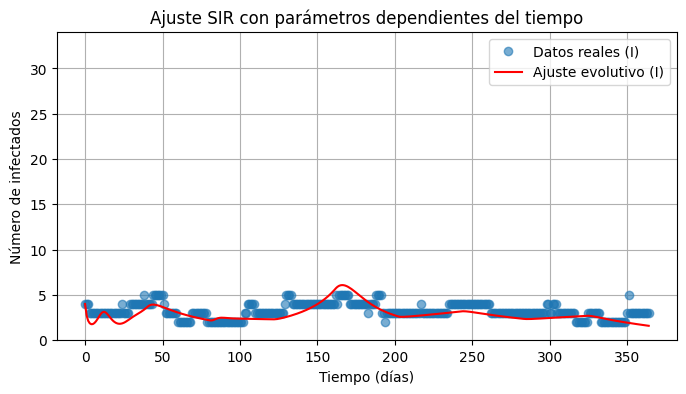

Tiempo de ajuste 82.3555s para el elemeto 22
Parametros:
a_t: ['0.0319', '0.0875', '0.6898', '0.7825', '0.0185', '0.9280', '0.5612', '0.8596', '0.0740', '0.8659']
gamma_I_t:  ['0.8677', '0.6837', '0.1466', '0.1664', '0.2645', '0.3076', '0.2138', '0.1917', '0.1211', '0.2192']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9803', '0.1027', '0.0781', '0.0380', '0.9350', '0.2581']


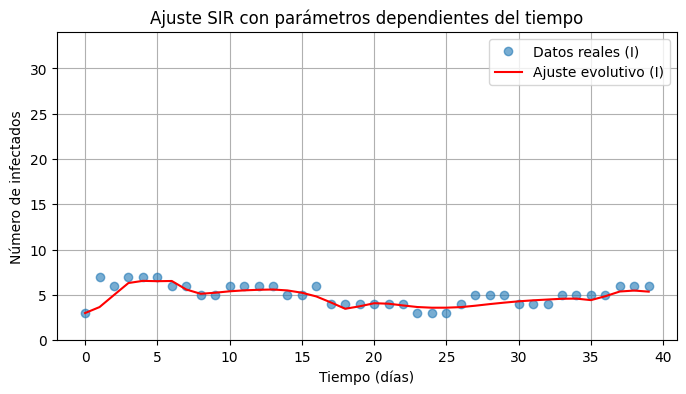

Tiempo de ajuste 35.4181s para el elemeto 23
Parametros:
a_t: ['0.9986', '0.1599', '0.3839', '0.9394', '0.6306', '0.9874', '0.9470', '0.1272', '0.9089', '0.2331']
gamma_I_t:  ['0.5657', '0.0589', '0.1384', '0.1017', '0.1671', '0.1613', '0.0697', '0.1058', '0.0097', '0.3251']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9649', '0.1960', '0.0117', '0.9593', '0.0266', '0.6126']


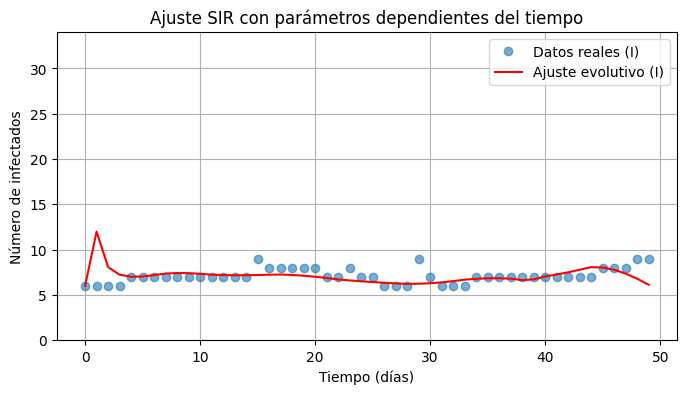

Tiempo de ajuste 45.7061s para el elemeto 24
Parametros:
a_t: ['0.5196', '0.2204', '0.1564', '0.0456', '0.6156', '0.5468', '0.9954', '0.4559', '0.1089', '0.9335']
gamma_I_t:  ['0.2288', '0.0725', '0.0160', '0.1873', '0.0608', '0.0423', '0.0616', '0.0312', '0.1339', '0.1312']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9096', '0.0170', '0.0505', '0.6003', '0.7495', '0.4549']


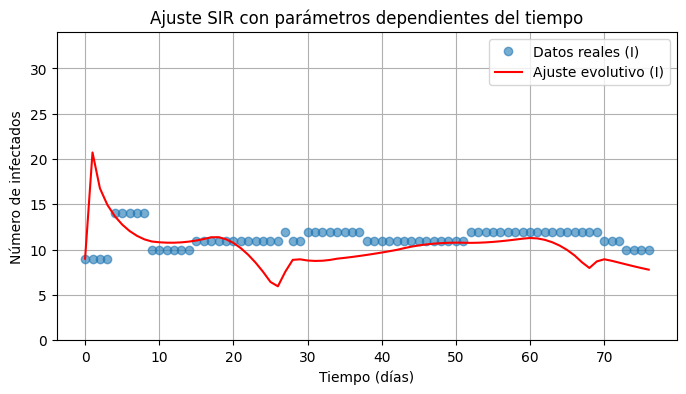

Tiempo de ajuste 54.6079s para el elemeto 25
Tiempo de ajuste 0.0000s para el elemeto 26
Parametros:
a_t: ['0.4927', '0.2608', '0.6336', '0.9765', '0.7004', '0.8295', '0.5365', '0.8240', '0.4175', '0.3465']
gamma_I_t:  ['0.2261', '0.4173', '0.0696', '0.0139', '0.0125', '0.0347', '0.2481', '0.5822', '0.2155', '0.0824']
b, gamma_S, gamma_R, delta_, delta_L, delta_H :  ['0.9700', '0.1405', '0.1388', '0.1153', '0.2244', '0.0662']


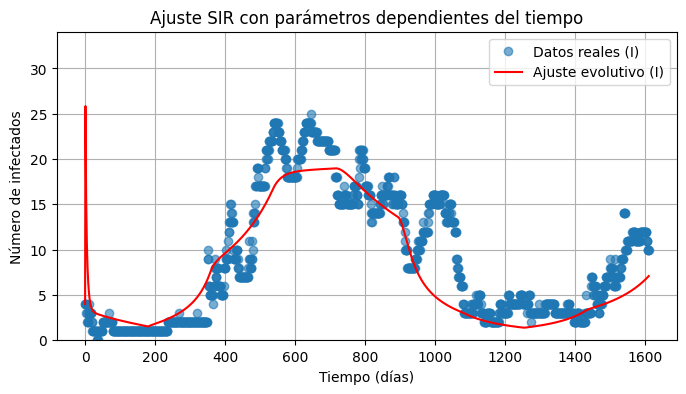

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from scipy.integrate import odeint
import pygad

import ruptures as rpt


import time




def gen_particion(datos:np.ndarray, pen:int =10, flag_print:bool=False, model:str="l2") -> np.ndarray:
    model=model
    algo = rpt.Pelt(model=model).fit(datos)
    result = algo.predict(pen=pen)

    if flag_print:
        print("Cambios detectados: ", len(result))
        plt.figure(figsize=(10, 6))
        plt.plot(datos, 'b', label="Infectados")

        for cp in result:
            plt.axvline(x=cp, color='r', linestyle='--', label="Puntos de cambio" if cp==result[0] else "")

        plt.title("Cambios en la serie de tiempo")
        plt.xlabel("Tiempo")
        plt.ylabel("Infectados")
        plt.legend()
        plt.show()

    puntos = [0] + result + [len(datos)]

    segmentos = []
    for i in range(len(puntos) - 1):
        inicio = puntos[i]
        fin = puntos[i+1]
        segmentos.append(datos[inicio:fin])

    return segmentos

    

def plot_res_evolutivo(datos_I:np.ndarray, m:int =10, generations:int =50, pop_size:int =30) -> None:
    if len(datos_I) ==0:
        return;

    # 1. Preparar datos y condiciones iniciales
    Nt = len(datos_I)
    t = np.linspace(0, Nt-1, Nt)
    I0 = datos_I[0]
    R0 = 0.0
    N = 34
    S0 = N - I0 - R0
    X0 = (S0, I0, R0)

    # 2. Defino la derivada con parámetros dependientes del tiempo
    def deriv(X, t, genes):
        S, I, R = X
        # Interpolación de a(t) y gamma_I(t)
        pts_t = np.linspace(0, Nt-1, m)
        a_t = np.interp(t, pts_t, genes[0:m])
        gamma_I_t = np.interp(t, pts_t, genes[m:2*m])
        # Constantes b, gamma_S, gamma_R, delta_, delta_L, delta_H
        b, gamma_S, gamma_R, delta_, delta_L, delta_H = genes[2*m:]
        dS = b - gamma_S*S - a_t*S*I + delta_L*R
        dI = a_t*S*I - (gamma_I_t + delta_)*I + delta_H*R
        dR = delta_*I - (gamma_R + delta_H + delta_L)*R
        return [dS, dI, dR]

    # 3. Fitness function con los 3 parámetros requeridos por PyGAD
    # Error cuadratico medio
    def fitness(ga_instance, solution, sol_idx):
        sim = odeint(deriv, X0, t, args=(solution,))
        I_pred = sim[:, 1]
        mse = np.mean((I_pred - datos_I) ** 2)
        return -mse

    # 4. Configuración del GA
    num_genes = 2*m + 6
    ga = pygad.GA(
        num_generations=generations,
        sol_per_pop=pop_size,
        num_parents_mating=pop_size//2,
        fitness_func=fitness,
        num_genes=num_genes,
        gene_space=[{'low': 0.0, 'high': 1.0}] * num_genes,
        mutation_percent_genes=10,
        suppress_warnings=True
    )

    # 5. Ejecutar GA y extraer la mejor solución
    ga.run()
    best_solution, best_fitness, _ = ga.best_solution()
    
    # 6. Simulación final con parámetros óptimos
    sim = odeint(deriv, X0, t, args=(best_solution,))
    S_fit, I_fit, R_fit = sim.T

    print("Parametros:")
    print("a_t:", [f'{x:0.4f}' for x in best_solution[0:m]])
    print("gamma_I_t: ", [f'{x:0.4f}' for x in best_solution[m:2*m] ])
    print("b, gamma_S, gamma_R, delta_, delta_L, delta_H : ", [f'{x:0.4f}' for x in best_solution[2*m:]])

    index_ = np.linspace(0, len(datos_I)-1, len(datos_I))
    # 7. Gráfica de ajuste
    plt.figure(figsize=(8,4))
    plt.plot(index_, datos_I, 'o', label="Datos reales (I)", alpha=0.6)
    plt.plot(index_, I_fit, '-', color='red', label="Ajuste evolutivo (I)")
    plt.title("Ajuste SIR con parámetros dependientes del tiempo")
    plt.xlabel("Tiempo (días)")
    plt.ylabel("Número de infectados")
    plt.ylim(0, N)
    plt.grid(True)
    plt.legend()
    plt.show()


def main():
    # try:
    archivo = "resumen.csv"
    df = pd.read_csv(archivo)
    datos_I  = df["Infectados"].values
    
    particion = gen_particion(datos_I, pen=50, flag_print=True)

    plot_res_evolutivo(datos_I)

    for segmento, i in zip(particion, range(1, len(particion)+1)):
        inicio = time.time()
        plot_res_evolutivo(segmento)
        fin = time.time()

        print(f"Tiempo de ajuste {fin - inicio:0.4f}s para el elemeto {i}")

    plot_res_evolutivo(datos_I)
    # except Exception as e:
    #     print(f"Error: {e}")


if __name__ == "__main__":
    main()



Cambios detectados:  25


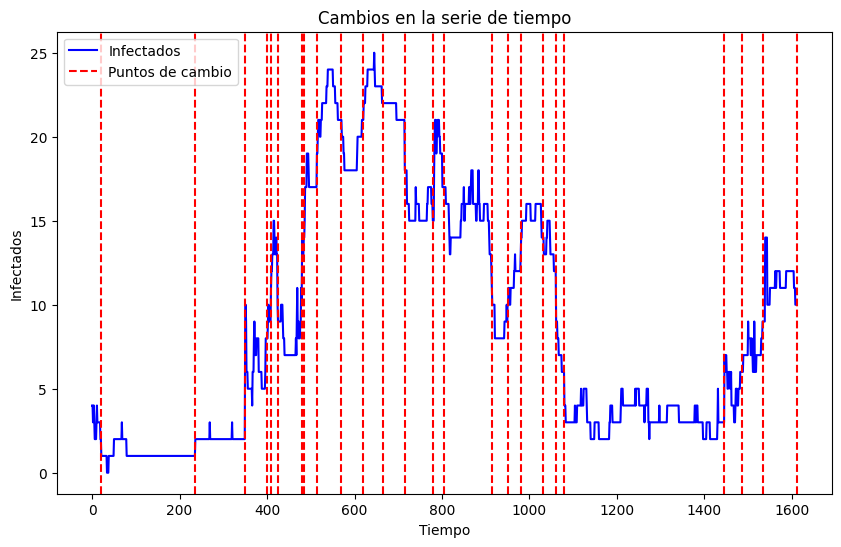

'float' object has no attribute 'min'
Traceback (most recent call last):
  File "c:\Users\cesar\miniconda3\envs\AnFin\Lib\site-packages\pygad\pygad.py", line 1559, in cal_pop_fitness
    fitness = self.fitness_func(self, sol, sol_idx)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\cesar\AppData\Local\Temp\ipykernel_14144\3577776600.py", line 64, in fitness
    sim = odeint(deriv, X0, t, args=(solution,))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\cesar\miniconda3\envs\AnFin\Lib\site-packages\scipy\integrate\_odepack_py.py", line 254, in odeint
    output = _odepack.odeint(func, y0, t, args, Dfun, col_deriv, ml, mu,
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\cesar\AppData\Local\Temp\ipykernel_14144\3577776600.py", line 51, in deriv
    a_t = eval_bspline(t, coeffs_a, t.min(), t.max(), degree=3)
                                    ^^^^^
AttributeError: 'float' object has no attribute 'min'
'float'

AttributeError: 'float' object has no attribute 'min'

In [4]:
from scipy.interpolate import BSpline
import numpy as np

def eval_bspline(
    t:np.ndarray,
    coeffs: np.ndarray,
    t_min: float, 
    t_max: float,
    degree: int =3
) -> np.ndarray:
    k = degree
    n_coeffs = len(coeffs)

    n_internal = n_coeffs - (k + 1)
    if n_internal < 0:
        raise ValueError("La cantidad de coeficientes es insuficiente")

    internal_knots = np.linspace(t_min, t_max, n_internal+2)[1:-1]

    knots = np.concatenate((
        np.repeat(t_min, k+1),
        internal_knots,
        np.repeat(t_max, k+1)
    ))

    spline = BSpline(knots, coeffs, k, extrapole=True)

    return spline(t)
def plot_res_evolutivo(datos_I:np.ndarray, m:int =10, generations:int =50, pop_size:int =30) -> None:
    if len(datos_I) ==0:
        return;

    # 1. Preparar datos y condiciones iniciales
    Nt = len(datos_I)
    t = np.linspace(0, Nt-1, Nt)
    I0 = datos_I[0]
    R0 = 0.0
    N = 34
    S0 = N - I0 - R0
    X0 = (S0, I0, R0)

    # 2. Defino la derivada con parámetros dependientes del tiempo
    def deriv(X, t, genes):
        S, I, R = X
        
        n_basis = m 
        coeffs_a = genes[0:m]
        coeffs_gammaI = genes[m: 2 * m]

        # Interpolación de a(t) y gamma_I(t)
        a_t = eval_bspline(t, coeffs_a, t.min(), t.max(), degree=3)
        gamma_I_t = eval_bspline(t, coeffs_gammaI, t.min(), t.max(), degree=3)

        # Constantes b, gamma_S, gamma_R, delta_, delta_L, delta_H
        b, gamma_S, gamma_R, delta_, delta_L, delta_H = genes[2*m:]
        dS = b - gamma_S*S - a_t*S*I + delta_L*R
        dI = a_t*S*I - (gamma_I_t + delta_)*I + delta_H*R
        dR = delta_*I - (gamma_R + delta_H + delta_L)*R
        return [dS, dI, dR]

    # 3. Fitness function con los 3 parámetros requeridos por PyGAD
    # Error cuadratico medio
    def fitness(ga_instance, solution, sol_idx):
        sim = odeint(deriv, X0, t, args=(solution,))
        I_pred = sim[:, 1]
        mse = np.mean((I_pred - datos_I) ** 2)
        return -mse

    # 4. Configuración del GA
    num_genes = 2*m + 6
    ga = pygad.GA(
        num_generations=generations,
        sol_per_pop=pop_size,
        num_parents_mating=pop_size//2,
        fitness_func=fitness,
        num_genes=num_genes,
        gene_space=[{'low': 0.0, 'high': 1.0}] * num_genes,
        mutation_percent_genes=10,
        suppress_warnings=True
    )

    # 5. Ejecutar GA y extraer la mejor solución
    ga.run()
    best_solution, best_fitness, _ = ga.best_solution()
    
    # 6. Simulación final con parámetros óptimos
    sim = odeint(deriv, X0, t, args=(best_solution,))
    S_fit, I_fit, R_fit = sim.T

    print("Parametros:")
    print("a_t:", [f'{x:0.4f}' for x in best_solution[0:m]])
    print("gamma_I_t: ", [f'{x:0.4f}' for x in best_solution[m:2*m] ])
    print("b, gamma_S, gamma_R, delta_, delta_L, delta_H : ", [f'{x:0.4f}' for x in best_solution[2*m:]])

    index_ = np.linspace(0, len(datos_I)-1, len(datos_I))
    # 7. Gráfica de ajuste
    plt.figure(figsize=(8,4))
    plt.plot(index_, datos_I, 'o', label="Datos reales (I)", alpha=0.6)
    plt.plot(index_, I_fit, '-', color='red', label="Ajuste evolutivo (I)")
    plt.title("Ajuste SIR con parámetros dependientes del tiempo")
    plt.xlabel("Tiempo (días)")
    plt.ylabel("Número de infectados")
    plt.ylim(0, N)
    plt.grid(True)
    plt.legend()
    plt.show()


archivo = "resumen.csv"
df = pd.read_csv(archivo)
datos_I  = df["Infectados"].values

particion = gen_particion(datos_I, pen=50, flag_print=True)

plot_res_evolutivo(datos_I)

for segmento, i in zip(particion, range(1, len(particion)+1)):
    inicio = time.time()
    plot_res_evolutivo(segmento)
    fin = time.time()

    print(f"Tiempo de ajuste {fin - inicio:0.4f}s para el elemeto {i}")

plot_res_evolutivo(datos_I)